In [868]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\..'))
	print(os.getcwd())
except:
	pass


e:\


In [869]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score


# Import Data

In [870]:
data = pd.read_csv('E:/workspace/python/scikitlearn/predict_sales.csv', engine='python', error_bad_lines=False)
columns = data.columns.values
feature_columns = columns[:-1]
target_column = columns[-1]
print(feature_columns) 
print(target_column)
print(data.shape)
data.head()



['Item_Identifier' 'Item_Weight' 'Item_Fat_Content' 'Item_Visibility'
 'Item_Type' 'Item_MRP' 'Outlet_Identifier' 'Outlet_Establishment_Year'
 'Outlet_Size' 'Outlet_Location_Type' 'Outlet_Type']
Item_Outlet_Sales
(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [871]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [872]:
for col in columns:
    colRange = data[col].unique().shape
    print(col, '-', 'categorical' if colRange[0] < 100 else 'continuous', '-', colRange)


Item_Identifier - continuous - (1559,)
Item_Weight - continuous - (416,)
Item_Fat_Content - categorical - (5,)
Item_Visibility - continuous - (7880,)
Item_Type - categorical - (16,)
Item_MRP - continuous - (5938,)
Outlet_Identifier - categorical - (10,)
Outlet_Establishment_Year - categorical - (9,)
Outlet_Size - categorical - (4,)
Outlet_Location_Type - categorical - (3,)
Outlet_Type - categorical - (4,)
Item_Outlet_Sales - continuous - (3493,)


# Find Missing Values

In [873]:
data.isnull().sum() # Item_Weight is continuous and Outlet_Size is categorical. 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [874]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

# Fill missing Values

In [875]:
data.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year', 'Outlet_Size']).count()

Item_Identifier  \
Outlet_Type       Outlet_Location_Type Outlet_Establishment_Year Outlet_Size                    
Grocery Store     Tier 1               1985                      Small                    528   
Supermarket Type1 Tier 1               1997                      Small                    930   
                                       1999                      Medium                   930   
                  Tier 2               2004                      Small                    930   
                  Tier 3               1987                      High                     932   
Supermarket Type2 Tier 3               2009                      Medium                   928   
Supermarket Type3 Tier 3               1985                      Medium                   935   

                                                                              Item_Weight  \
Outlet_Type       Outlet_Location_Type Outlet_Establishment_Year Outlet_Size                
Grocery Store     Tier 1               1985                      Small                  0   
Supermarket Type1 Tier 1               1997                      Small                930   
                                       1999                      Medium               930   
                  Tier 2               2004                      Small                930   
                  Tier 3               1987                      High                 932   
Supermarket Type2 Tier 3               2009                      Medium               928   
Supermarket Type3 Tier 3               1985                      Medium                 0   

                                                                              Item_Fat_Content  \
Outlet_Type       Outlet_Location_Type Outlet_Establishment_Year Outlet_Size                     
Grocery Store     Tier 1               1985                      Small                     528   
Supermarket Type1 Tier 1               1997                      Small                     930   
                                       1999                      Medium                    930   
                  Tier 2               2004                      Small                     930   
                  Tier 3               1987                      High                      932   
Supermarket Type2 Tier 3               2009                      Medium                    928   
Supermarket Type3 Tier 3               1985                      Medium                    935   

                                                                              Item_Visibility  \
Outlet_Type       Outlet_Location_Type Outlet_Establishment_Year Outlet_Size                    
Grocery Store     Tier 1               1985                      Small                    528   
Supermarket Type1 Tier 1               1997                      Small                    930   
                                       1999                      Medium                   930   
                  Tier 2               2004                      Small                    930   
                  Tier 3               1987                      High                     932   
Supermarket Type2 Tier 3               2009                      Medium                   928   
Supermarket Type3 Tier 3               1985                      Medium                   935   

                                                                              Item_Type  \
Outlet_Type       Outlet_Location_Type Outlet_Establishment_Year Outlet_Size              
Grocery Store     Tier 1               1985                      Small              528   
Supermarket Type1 Tier 1               1997                      Small              930   
                                       1999                      Medium             930   
                  Tier 2               2004                      Small              930   
                  Tier 3               1987                    

In [876]:
sp_type2_outlets = data['Outlet_Size'][data['Outlet_Type'] == 'Supermarket Type2']
print(sp_type2_outlets.unique())
print(sp_type2_outlets.shape)
print(sp_type2_outlets.isnull().sum())

['Medium']
(928,)
0


In [877]:
sp_type3_outlets = data['Outlet_Size'][data['Outlet_Type'] == 'Supermarket Type3']
print(sp_type3_outlets.unique())
print(sp_type3_outlets.shape)
print(sp_type3_outlets.isnull().sum())

['Medium']
(935,)
0


In [878]:
grocery_store_outlets = data['Outlet_Size'][data['Outlet_Type'] == 'Grocery Store']
print(grocery_store_outlets.unique())
print(grocery_store_outlets.shape)
print(grocery_store_outlets.isnull().sum())


[nan 'Small']
(1083,)
555


**filling outlet_size for grocery stores as small.**

In [879]:
grocery_store_outlets.fillna('Small', inplace=True)
print(grocery_store_outlets.unique())
print(grocery_store_outlets.shape)
print(grocery_store_outlets.isnull().sum())

['Small']
(1083,)
0


In [880]:
data['Outlet_Size'][data['Outlet_Type'] == 'Grocery Store'] = grocery_store_outlets

C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [881]:
sp_type1_outlets = data['Outlet_Size'][data['Outlet_Type'] == 'Supermarket Type1']
print(sp_type1_outlets.unique())
print(sp_type1_outlets.shape)
print(sp_type1_outlets.isnull().sum())

['Medium' 'High' nan 'Small']
(5577,)
1855


In [882]:
data.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year', 'Outlet_Size']).count()

Item_Identifier  \
Outlet_Type       Outlet_Location_Type Outlet_Establishment_Year Outlet_Size                    
Grocery Store     Tier 1               1985                      Small                    528   
                  Tier 3               1998                      Small                    555   
Supermarket Type1 Tier 1               1997                      Small                    930   
                                       1999                      Medium                   930   
                  Tier 2               2004                      Small                    930   
                  Tier 3               1987                      High                     932   
Supermarket Type2 Tier 3               2009                      Medium                   928   
Supermarket Type3 Tier 3               1985                      Medium                   935   

                                                                              Item_Weight  \
Outlet_Type       Outlet_Location_Type Outlet_Establishment_Year Outlet_Size                
Grocery Store     Tier 1               1985                      Small                  0   
                  Tier 3               1998                      Small                555   
Supermarket Type1 Tier 1               1997                      Small                930   
                                       1999                      Medium               930   
                  Tier 2               2004                      Small                930   
                  Tier 3               1987                      High                 932   
Supermarket Type2 Tier 3               2009                      Medium               928   
Supermarket Type3 Tier 3               1985                      Medium                 0   

                                                                              Item_Fat_Content  \
Outlet_Type       Outlet_Location_Type Outlet_Establishment_Year Outlet_Size                     
Grocery Store     Tier 1               1985                      Small                     528   
                  Tier 3               1998                      Small                     555   
Supermarket Type1 Tier 1               1997                      Small                     930   
                                       1999                      Medium                    930   
                  Tier 2               2004                      Small                     930   
                  Tier 3               1987                      High                      932   
Supermarket Type2 Tier 3               2009                      Medium                    928   
Supermarket Type3 Tier 3               1985                      Medium                    935   

                                                                              Item_Visibility  \
Outlet_Type       Outlet_Location_Type Outlet_Establishment_Year Outlet_Size                    
Grocery Store     Tier 1               1985                      Small                    528   
                  Tier 3               1998                      Small                    555   
Supermarket Type1 Tier 1               1997                      Small                    930   
                                       1999                      Medium                   930   
                  Tier 2               2004                      Small                    930   
                  Tier 3               1987                      High                     932   
Supermarket Type2 Tier 3               2009                      Medium                   928   
Supermarket Type3 Tier 3               1985                      Medium                   935   

                                                                              Item_Type  \
Outlet_Type       Outlet_Location_Type Outlet_Establishment_Year Outlet_Size              
Grocery Store     Tier 1               198

In [883]:
sp_type1_tier2_outlets = data['Outlet_Size'][(data['Outlet_Type'] == 'Supermarket Type1') & (data['Outlet_Location_Type'] == 'Tier 2')]
print(sp_type1_tier2_outlets.unique())
print(sp_type1_tier2_outlets.shape)
print(sp_type1_tier2_outlets.isnull().sum())

[nan 'Small']
(2785,)
1855


**filling outlet_size 'Small' for supermarket type1 and tier2.**

In [884]:
sp_type1_tier2_outlets.fillna('Small', inplace=True)
print(grocery_store_outlets.unique())
print(grocery_store_outlets.shape)
print(grocery_store_outlets.isnull().sum())

['Small']
(1083,)
0


In [885]:
data['Outlet_Size'][(data['Outlet_Type'] == 'Supermarket Type1') & (data['Outlet_Location_Type'] == 'Tier 2')] = sp_type1_tier2_outlets

C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [886]:
data['Outlet_Size'].isnull().sum()

0

In [887]:
data['Outlet_Size'].isnull().sum()

0

In [888]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

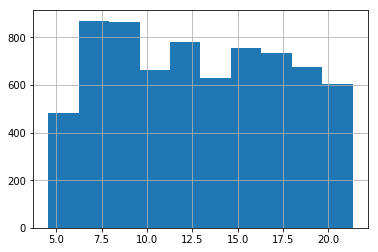

In [889]:
data['Item_Weight'].hist()

In [890]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [891]:
data['Item_Fat_Content'][(data['Item_Fat_Content'] == 'Low Fat') | (data['Item_Fat_Content'] == 'low fat') | (data['Item_Fat_Content'] == 'LF')] = 'lf'
data['Item_Fat_Content'][(data['Item_Fat_Content'] == 'Regular') | (data['Item_Fat_Content'] == 'reg')] = 'reg'
data['Item_Fat_Content'].head()


C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0     lf
1    reg
2     lf
3    reg
4     lf
Name: Item_Fat_Content, dtype: object

In [892]:
data['Item_Fat_Content'].unique()

array(['lf', 'reg'], dtype=object)

In [893]:
items_null = data[data['Item_Weight'].isnull() == True].groupby(['Item_Type', 'Item_Fat_Content'])
items_null.count()

Item_Identifier  Item_Weight  \
Item_Type             Item_Fat_Content                                 
Baking Goods          lf                             67            0   
                      reg                            45            0   
Breads                lf                             27            0   
                      reg                            20            0   
Breakfast             lf                              7            0   
                      reg                            14            0   
Canned                lf                             55            0   
                      reg                            55            0   
Dairy                 lf                             64            0   
                      reg                            52            0   
Frozen Foods          lf                             75            0   
                      reg                            63            0   
Fruits and Vegetables lf                            112            0   
                      reg                           101            0   
Hard Drinks           lf                             31            0   
Health and Hygiene    lf                             90            0   
Household             lf                            151            0   
Meat                  lf                             38            0   
                      reg                            50            0   
Others                lf                             32            0   
Seafood               lf                              8            0   
                      reg                             5            0   
Snack Foods           lf                            127            0   
                      reg                            85            0   
Soft Drinks           lf                             59            0   
                      reg                            12            0   
Starchy Foods         lf                              8            0   
                      reg                            10            0   

                                        Item_Visibility  Item_MRP  \
Item_Type             Item_Fat_Content                              
Baking Goods          lf                             67        67   
                      reg                            45        45   
Breads                lf                             27        27   
                      reg                            20        20   
Breakfast             lf                              7         7   
                      reg                            14        14   
Canned                lf                             55        55   
                      reg                            55        55   
Dairy                 lf                             64        64   
                      reg                            52        52   
Frozen Foods          lf                             75        75   
                      reg                            63        63   
Fruits and Vegetables lf                            112       112   
                      reg                           101       101   
Hard Drinks           lf                             31        31   
Health and Hygiene    lf                             90        90   
Household             lf                            151       151   
Meat                  lf                             38        38   
                      reg                            50        50   
Others                lf                             32        32   
Seafood               lf                              8         8   
                      reg                             5         5   
Snack Foods           lf                            127       127   
                      reg                            85        85   
Soft Drinks           lf                             59        59   
                

In [894]:
items_null = items_null.apply(lambda x:x)
items_null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,lf,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,lf,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,reg,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,lf,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,reg,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,reg,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,reg,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,lf,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,reg,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,lf,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


In [895]:
item_types = data['Item_Type'].unique()
item_fat_types = data['Item_Fat_Content'].unique()

In [896]:
for itype in item_types:
    for ftype in item_fat_types:
        temp = data[(data['Item_Type'] == itype) & (data['Item_Fat_Content'] == ftype)][['Item_Weight', 'Item_Visibility', 'Item_MRP']]
        print(itype, ftype, temp.isnull().sum())
        print(temp.describe())

Dairy lf Item_Weight        64
Item_Visibility     0
Item_MRP            0
dtype: int64
       Item_Weight  Item_Visibility    Item_MRP
count   354.000000       418.000000  418.000000
mean     13.391497         0.069884  147.115989
std       4.652229         0.051062   72.123408
min       5.440000         0.000000   33.487400
25%       8.930000         0.031979   85.522400
50%      13.350000         0.058319  152.184000
75%      17.600000         0.097113  216.760000
max      20.700000         0.304737  266.688400
Dairy reg Item_Weight        52
Item_Visibility     0
Item_MRP            0
dtype: int64
       Item_Weight  Item_Visibility    Item_MRP
count   212.000000       264.000000  264.000000
mean     13.483797         0.076454  150.689305
std       4.753762         0.056296   67.461118
min       4.805000         0.000000   42.808600
25%      10.500000         0.030854   94.793600
50%      12.700000         0.067982  144.710200
75%      17.875000         0.109185  212.699400
max    

Hard Drinks lf Item_Weight        31
Item_Visibility     0
Item_MRP            0
dtype: int64
       Item_Weight  Item_Visibility    Item_MRP
count   183.000000       214.000000  214.000000
mean     11.400328         0.064943  137.077928
std       4.239144         0.049995   62.023378
min       4.610000         0.000000   34.253200
25%       8.260000         0.030711  106.318800
50%      10.100000         0.059335  144.944400
75%      14.850000         0.086777  177.684400
max      19.700000         0.298205  261.427800
Hard Drinks reg Item_Weight        0
Item_Visibility    0
Item_MRP           0
dtype: int64
       Item_Weight  Item_Visibility  Item_MRP
count          0.0              0.0       0.0
mean           NaN              NaN       NaN
std            NaN              NaN       NaN
min            NaN              NaN       NaN
25%            NaN              NaN       NaN
50%            NaN              NaN       NaN
75%            NaN              NaN       NaN
max           

In [897]:
iw_meat_reg = data[(data['Item_Type'] == 'Meat') & (data['Item_Fat_Content'] == 'reg')][['Item_Weight', 'Item_Visibility', 'Item_MRP']]

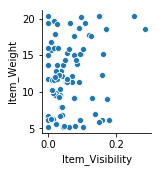

In [898]:
sns.pairplot(data=iw_meat_reg, x_vars=['Item_Visibility'], y_vars=['Item_Weight'], diag_kind='hist')

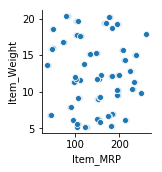

In [899]:
sns.pairplot(data=iw_meat_reg, x_vars=['Item_MRP'], y_vars=['Item_Weight'], diag_kind='hist')

In [900]:
data[(data['Item_Type'] == 'Meat') & (data['Item_Fat_Content'] == 'reg')].groupby(['Item_Identifier', 'Item_Weight']).count()

,,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Item_Weight,,,,,,,,,,
FDH31,12.000,3,3,3,3,3,3,3,3,3,3
FDI07,12.350,5,5,5,5,5,5,5,5,5,5
FDJ27,17.700,4,4,4,4,4,4,4,4,4,4
FDJ55,12.800,7,7,7,7,7,7,7,7,7,7
FDL03,19.250,4,4,4,4,4,4,4,4,4,4
FDM15,11.800,6,6,6,6,6,6,6,6,6,6
FDM27,12.350,3,3,3,3,3,3,3,3,3,3
FDM51,11.800,6,6,6,6,6,6,6,6,6,6
FDN03,9.800,3,3,3,3,3,3,3,3,3,3


In [901]:
data[(data['Item_Type'] == 'Meat') & (data['Item_Fat_Content'] == 'reg') & (data['Item_Weight'].isnull())]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
112,FDW39,NaN,reg,0.064625,Meat,176.9370,OUT019,1985,Small,Tier 1,Grocery Store,176.4370
357,FDN39,NaN,reg,0.065203,Meat,166.0816,OUT027,1985,Medium,Tier 3,Supermarket Type3,5033.4480
434,FDW27,NaN,reg,0.264125,Meat,155.7314,OUT019,1985,Small,Tier 1,Grocery Store,155.1314
669,FDO51,NaN,reg,0.041779,Meat,43.4112,OUT027,1985,Medium,Tier 3,Supermarket Type3,1107.8912
817,FDQ15,NaN,reg,0.150342,Meat,83.1276,OUT027,1985,Medium,Tier 3,Supermarket Type3,1868.2348
1416,FDR51,NaN,reg,0.172630,Meat,148.4708,OUT027,1985,Medium,Tier 3,Supermarket Type3,3761.7700
1429,FDQ03,NaN,reg,0.136593,Meat,238.0248,OUT019,1985,Small,Tier 1,Grocery Store,711.0744
1949,FDW27,NaN,reg,0.150123,Meat,154.5314,OUT027,1985,Medium,Tier 3,Supermarket Type3,1396.1826
1970,FDW39,NaN,reg,0.036732,Meat,177.2370,OUT027,1985,Medium,Tier 3,Supermarket Type3,4763.7990
2276,FDQ27,NaN,reg,0.077481,Meat,101.3990,OUT019,1985,Small,Tier 1,Grocery Store,206.3980


In [902]:
item_identifiers = data[data['Item_Weight'].isnull()]['Item_Identifier']
item_identifiers.shape

(1463,)

In [903]:
for item_id in item_identifiers:
    temp = data[data['Item_Identifier'] == item_id]['Item_Weight']
    print(temp, temp.mean())

7        NaN
585     19.0
2623    19.0
3382    19.0
4585    19.0
6087    19.0
7883    19.0
Name: Item_Weight, dtype: float64 19.0
18       NaN
1366     NaN
3127    8.26
5310    8.26
7022    8.26
7192    8.26
8483    8.26
Name: Item_Weight, dtype: float64 8.26
21        NaN
1788    8.315
2973    8.315
5319    8.315
6285    8.315
7004    8.315
7259    8.315
Name: Item_Weight, dtype: float64 8.315
23       NaN
4652    15.5
6212    15.5
Name: Item_Weight, dtype: float64 15.5
29       NaN
3609    14.5
4297    14.5
5760    14.5
6257     NaN
6346    14.5
6478    14.5
7031    14.5
Name: Item_Weight, dtype: float64 14.5
36       NaN
301      NaN
1851    20.2
3318    20.2
4283    20.2
4491    20.2
6306    20.2
7928    20.2
Name: Item_Weight, dtype: float64 20.2
38        NaN
1447    6.385
5202    6.385
7126    6.385
Name: Item_Weight, dtype: float64 6.385000000000001
39        NaN
385     15.25
950     15.25
1144    15.25
2629    15.25
3569    15.25
7915    15.25
Name: Item_Weight, dtype: float6

700      NaN
2115    18.7
2606    18.7
5820    18.7
6658    18.7
8140    18.7
Name: Item_Weight, dtype: float64 18.7
715      NaN
3850    16.1
5727    16.1
Name: Item_Weight, dtype: float64 16.1
11      18.5
721      NaN
747     18.5
1951    18.5
5772    18.5
7772    18.5
Name: Item_Weight, dtype: float64 18.5
723      NaN
2994    11.6
3045    11.6
5571    11.6
5598    11.6
6392    11.6
7546    11.6
8354    11.6
Name: Item_Weight, dtype: float64 11.599999999999998
620     8.1
725     NaN
3559    8.1
7558    NaN
Name: Item_Weight, dtype: float64 8.1
378     16.75
726       NaN
1648    16.75
7156    16.75
8019    16.75
Name: Item_Weight, dtype: float64 16.75
739      NaN
6113    6.52
Name: Item_Weight, dtype: float64 6.52
742       NaN
787     7.825
1014      NaN
1965    7.825
4232    7.825
6294    7.825
Name: Item_Weight, dtype: float64 7.825
752      NaN
761     16.1
4677    16.1
Name: Item_Weight, dtype: float64 16.1
758      NaN
1553     NaN
3921    15.6
7525    15.6
8074    15.6
Nam

488     10.895
1173       NaN
4030    10.895
6519    10.895
7305    10.895
7524    10.895
8129    10.895
Name: Item_Weight, dtype: float64 10.894999999999998
1176      NaN
1400    11.65
2536    11.65
4952    11.65
5785    11.65
6467    11.65
Name: Item_Weight, dtype: float64 11.65
34      17.5
1177     NaN
5545    17.5
7186     NaN
7801    17.5
Name: Item_Weight, dtype: float64 17.5
68      17.6
1185     NaN
2789    17.6
3282    17.6
5478    17.6
7020    17.6
Name: Item_Weight, dtype: float64 17.6
1194     NaN
1274    8.63
2325     NaN
6230    8.63
6613    8.63
7610    8.63
Name: Item_Weight, dtype: float64 8.63
1204     NaN
2733    19.7
2781    19.7
3852    19.7
Name: Item_Weight, dtype: float64 19.7
1222     NaN
2166    18.0
4692    18.0
6075    18.0
6677    18.0
8355    18.0
Name: Item_Weight, dtype: float64 18.0
1225      NaN
1754    9.195
1929      NaN
3230    9.195
3514    9.195
3711    9.195
8176    9.195
Name: Item_Weight, dtype: float64 9.195
863     8.05
1240     NaN
5981    

Name: Item_Weight, dtype: float64 17.85
298     19.35
1000      NaN
1512    19.35
1847      NaN
2222    19.35
3933    19.35
6684    19.35
Name: Item_Weight, dtype: float64 19.35
982     7.68
1859     NaN
2002    7.68
4331    7.68
4543    7.68
5593    7.68
Name: Item_Weight, dtype: float64 7.68
1814      NaN
1865      NaN
3712    11.15
4522    11.15
Name: Item_Weight, dtype: float64 11.15
713     10.395
1880       NaN
3638    10.395
4338       NaN
4502    10.395
4853    10.395
8075    10.395
Name: Item_Weight, dtype: float64 10.395
84       NaN
1887     NaN
2032    12.6
3078    12.6
6347    12.6
6561    12.6
Name: Item_Weight, dtype: float64 12.6
1752     NaN
1889     NaN
2503    19.6
2561    19.6
3732    19.6
7795    19.6
8445    19.6
Name: Item_Weight, dtype: float64 19.6
214     14.65
1896      NaN
1969    14.65
2839    14.65
7166      NaN
7738    14.65
7926    14.65
Name: Item_Weight, dtype: float64 14.65
547     12.15
664     12.15
1902      NaN
4962    12.15
5677    12.15
6506    

326     16.35
477     16.35
2635      NaN
6815    16.35
7099    16.35
7787    16.35
Name: Item_Weight, dtype: float64 16.35
1077    15.85
1590    15.85
2641      NaN
3193    15.85
4178    15.85
5067    15.85
5705      NaN
8065    15.85
Name: Item_Weight, dtype: float64 15.85
973     12.15
2642      NaN
4385    12.15
5337    12.15
7269    12.15
8031      NaN
Name: Item_Weight, dtype: float64 12.15
292     12.85
2648      NaN
2932    12.85
6013    12.85
6907    12.85
8109    12.85
Name: Item_Weight, dtype: float64 12.85
608     8.18
1071    8.18
2659     NaN
3422    8.18
5006    8.18
6146    8.18
8400    8.18
Name: Item_Weight, dtype: float64 8.18
144     14.0
1404    14.0
1580    14.0
1959    14.0
2660     NaN
8432    14.0
Name: Item_Weight, dtype: float64 14.0
798     6.55
2663     NaN
3406    6.55
5209     NaN
7428    6.55
Name: Item_Weight, dtype: float64 6.55
1183    13.65
1952    13.65
2665      NaN
4870    13.65
6298    13.65
7125    13.65
7941    13.65
Name: Item_Weight, dtype: f

963     10.5
1936    10.5
3249     NaN
5001    10.5
Name: Item_Weight, dtype: float64 10.5
3252     NaN
3640    13.5
3970    13.5
4661    13.5
6630    13.5
8108    13.5
8242    13.5
Name: Item_Weight, dtype: float64 13.5
2301    7.26
3256     NaN
3983    7.26
6096    7.26
Name: Item_Weight, dtype: float64 7.260000000000001
1584    6.55
3269     NaN
4220    6.55
4981     NaN
5279    6.55
5407    6.55
6247    6.55
Name: Item_Weight, dtype: float64 6.55
984     9.3
2051    9.3
3277    NaN
5433    9.3
6150    9.3
6726    9.3
Name: Item_Weight, dtype: float64 9.3
1696    12.6
2429    12.6
3049    12.6
3286     NaN
3324    12.6
4961    12.6
7708    12.6
Name: Item_Weight, dtype: float64 12.6
2992    13.85
3288      NaN
4722    13.85
6139      NaN
Name: Item_Weight, dtype: float64 13.85
1001    8.185
3293      NaN
3463    8.185
4117    8.185
4212    8.185
7821    8.185
Name: Item_Weight, dtype: float64 8.185
737     20.35
1435    20.35
1827      NaN
3306      NaN
3343    20.35
6127    20.35
N

Name: Item_Weight, dtype: float64 8.5
347     19.5
479     19.5
1660    19.5
3151    19.5
3935     NaN
8430    19.5
Name: Item_Weight, dtype: float64 19.5
91      8.895
1063    8.895
2298    8.895
3940      NaN
5537    8.895
Name: Item_Weight, dtype: float64 8.895
1921    7.72
3472    7.72
3945     NaN
6322    7.72
8439    7.72
Name: Item_Weight, dtype: float64 7.72
447     8.775
1620    8.775
3948      NaN
4111    8.775
Name: Item_Weight, dtype: float64 8.775
2294    18.35
3118    18.35
3956      NaN
5681    18.35
7178    18.35
Name: Item_Weight, dtype: float64 18.35
2470    8.71
3819    8.71
3968     NaN
4786    8.71
4848    8.71
7379     NaN
Name: Item_Weight, dtype: float64 8.71
3976       NaN
5997    10.695
7840    10.695
8466    10.695
Name: Item_Weight, dtype: float64 10.695
3052    13.8
3676    13.8
3993     NaN
5752    13.8
5801    13.8
6908    13.8
Name: Item_Weight, dtype: float64 13.8
3994     NaN
4073    11.0
5041    11.0
7749    11.0
Name: Item_Weight, dtype: float64 11.0

821     6.575
1231    6.575
2399    6.575
4259    6.575
4608      NaN
6115    6.575
Name: Item_Weight, dtype: float64 6.575
3837    14.0
4611     NaN
5239    14.0
5363    14.0
7280    14.0
7588    14.0
Name: Item_Weight, dtype: float64 14.0
195     10.5
1273    10.5
2048    10.5
4620     NaN
5921    10.5
8393    10.5
Name: Item_Weight, dtype: float64 10.5
1375    15.35
1894    15.35
2592    15.35
4624      NaN
5792    15.35
Name: Item_Weight, dtype: float64 15.35
1724    5.695
3299    5.695
4631      NaN
6942      NaN
7058    5.695
Name: Item_Weight, dtype: float64 5.695
1934    8.42
2554    8.42
2925    8.42
3156    8.42
4634     NaN
8502    8.42
Name: Item_Weight, dtype: float64 8.42
122     20.25
457     20.25
1215    20.25
4295      NaN
4637      NaN
5251    20.25
5490    20.25
Name: Item_Weight, dtype: float64 20.25
505     9.195
3029      NaN
4571    9.195
4645      NaN
5004    9.195
5887    9.195
Name: Item_Weight, dtype: float64 9.195
88      6.305
4647      NaN
5028    6.305
5

Name: Item_Weight, dtype: float64 20.25
716     17.35
3492    17.35
5187      NaN
6289    17.35
6903      NaN
8395    17.35
Name: Item_Weight, dtype: float64 17.35
633        NaN
1248    10.895
2255    10.895
4525    10.895
5193       NaN
5328    10.895
Name: Item_Weight, dtype: float64 10.895
2880    14.0
3738    14.0
5194     NaN
6594    14.0
Name: Item_Weight, dtype: float64 14.0
2012    15.1
2757    15.1
4009     NaN
4199    15.1
5195     NaN
5503    15.1
6690    15.1
Name: Item_Weight, dtype: float64 15.1
798     6.55
2663     NaN
3406    6.55
5209     NaN
7428    6.55
Name: Item_Weight, dtype: float64 6.55
3068    14.1
5212     NaN
5354     NaN
6588    14.1
7093    14.1
Name: Item_Weight, dtype: float64 14.1
691     16.35
4040    16.35
4770    16.35
4842    16.35
5216      NaN
5851    16.35
7996      NaN
Name: Item_Weight, dtype: float64 16.35
1980    7.35
2228    7.35
5223     NaN
6344    7.35
Name: Item_Weight, dtype: float64 7.349999999999999
1832    7.035
2861    7.035
3410  

Name: Item_Weight, dtype: float64 8.155
421     13.15
1497    13.15
2023    13.15
2107    13.15
4560      NaN
5509    13.15
5761      NaN
8461    13.15
Name: Item_Weight, dtype: float64 13.15
712     13.8
1207    13.8
4238    13.8
4549    13.8
5763     NaN
Name: Item_Weight, dtype: float64 13.8
1524     NaN
1557    12.6
5766     NaN
6533    12.6
Name: Item_Weight, dtype: float64 12.6
2385    6.78
4047     NaN
5795     NaN
5942    6.78
7242    6.78
8233    6.78
Name: Item_Weight, dtype: float64 6.78
1509    16.7
1787    16.7
2404    16.7
4998    16.7
5784    16.7
5799     NaN
6535    16.7
7968    16.7
8292     NaN
Name: Item_Weight, dtype: float64 16.7
418     6.655
936     6.655
1581    6.655
5800      NaN
8008    6.655
Name: Item_Weight, dtype: float64 6.655
323     11.15
2392    11.15
5166    11.15
5804      NaN
Name: Item_Weight, dtype: float64 11.15
2044    15.35
2558    15.35
4265    15.35
4371    15.35
5806      NaN
6345    15.35
7612      NaN
Name: Item_Weight, dtype: float64 15

Name: Item_Weight, dtype: float64 10.5
96      12.15
1751    12.15
4072    12.15
6334      NaN
6390    12.15
6472    12.15
Name: Item_Weight, dtype: float64 12.15
171     16.6
535     16.6
583     16.6
2036    16.6
6337     NaN
Name: Item_Weight, dtype: float64 16.6
276     16.75
1255    16.75
1790    16.75
4346      NaN
6341      NaN
6787    16.75
7014    16.75
8039    16.75
Name: Item_Weight, dtype: float64 16.75
942     19.7
992     19.7
4251    19.7
4811    19.7
5498    19.7
6361     NaN
Name: Item_Weight, dtype: float64 19.7
9       19.2
6362     NaN
6419    19.2
7597     NaN
8419    19.2
Name: Item_Weight, dtype: float64 19.2
3250    10.5
3301    10.5
6368     NaN
6550    10.5
7681    10.5
Name: Item_Weight, dtype: float64 10.5
484     19.7
4364    19.7
4918    19.7
6375     NaN
6477    19.7
6805    19.7
6887    19.7
Name: Item_Weight, dtype: float64 19.7
56      9.195
141     9.195
3015    9.195
3998    9.195
6384      NaN
7061    9.195
7661    9.195
Name: Item_Weight, dtype: fl

Name: Item_Weight, dtype: float64 15.85
2173    12.35
2377    12.35
4745    12.35
6607    12.35
6859      NaN
7567      NaN
7775    12.35
Name: Item_Weight, dtype: float64 12.35
196     19.0
2408    19.0
5269    19.0
5810    19.0
6033    19.0
6869     NaN
Name: Item_Weight, dtype: float64 19.0
26      7.645
2289    7.645
5094    7.645
5652    7.645
6871      NaN
Name: Item_Weight, dtype: float64 7.645
1986    16.2
2300    16.2
2998    16.2
3374    16.2
5247    16.2
6875     NaN
7830    16.2
Name: Item_Weight, dtype: float64 16.2
1432    20.7
2179    20.7
2476     NaN
5234    20.7
6219    20.7
6883     NaN
7897    20.7
7914    20.7
Name: Item_Weight, dtype: float64 20.7
5932    7.725
6009    7.725
6092    7.725
6886      NaN
8224    7.725
Name: Item_Weight, dtype: float64 7.725
716     17.35
3492    17.35
5187      NaN
6289    17.35
6903      NaN
8395    17.35
Name: Item_Weight, dtype: float64 17.35
2727    18.35
3528    18.35
3545      NaN
5813    18.35
6906      NaN
Name: Item_Weight,

1200    19.6
1299    19.6
1838    19.6
2509    19.6
7532     NaN
7955    19.6
Name: Item_Weight, dtype: float64 19.6
1653    20.0
2897    20.0
5175    20.0
6085    20.0
6266    20.0
6277    20.0
7534     NaN
Name: Item_Weight, dtype: float64 20.0
1464    15.3
1891    15.3
2564    15.3
7378    15.3
7536     NaN
Name: Item_Weight, dtype: float64 15.3
154     7.365
2243    7.365
4475    7.365
5019    7.365
6654    7.365
7322    7.365
7539      NaN
7936    7.365
8458      NaN
Name: Item_Weight, dtype: float64 7.365000000000001
858      NaN
2374    5.88
3862    5.88
4499    5.88
6847    5.88
7464    5.88
7551     NaN
Name: Item_Weight, dtype: float64 5.88
557       NaN
586     9.395
3173    9.395
6894    9.395
7554      NaN
Name: Item_Weight, dtype: float64 9.395
620     8.1
725     NaN
3559    8.1
7558    NaN
Name: Item_Weight, dtype: float64 8.1
4322    5.305
7562      NaN
7748      NaN
7771    5.305
8161    5.305
Name: Item_Weight, dtype: float64 5.305
2173    12.35
2377    12.35
4745   

Name: Item_Weight, dtype: float64 5.405
318     13.35
534     13.35
4160    13.35
4534    13.35
8099      NaN
Name: Item_Weight, dtype: float64 13.35
1287    13.65
2021      NaN
2341    13.65
3431    13.65
7453    13.65
7699    13.65
8120      NaN
8141    13.65
Name: Item_Weight, dtype: float64 13.65
258     17.6
277     17.6
764     17.6
4211    17.6
4691    17.6
5071    17.6
6849     NaN
8123     NaN
Name: Item_Weight, dtype: float64 17.599999999999998
1890    20.25
2269    20.25
2316    20.25
4687    20.25
6366    20.25
8124      NaN
Name: Item_Weight, dtype: float64 20.25
152     13.65
1280      NaN
1815    13.65
4463    13.65
6065    13.65
7257    13.65
8125      NaN
Name: Item_Weight, dtype: float64 13.65
3476    4.905
3633    4.905
8131      NaN
Name: Item_Weight, dtype: float64 4.905
307     7.075
420     7.075
2654    7.075
6157    7.075
6194    7.075
6455    7.075
7728    7.075
8142      NaN
Name: Item_Weight, dtype: float64 7.075000000000001
248     10.1
1997    10.1
2234   

In [904]:
for item_id in item_identifiers:
    val = data[data['Item_Identifier'] == item_id]['Item_Weight'].mean()
    data.loc[(data['Item_Identifier'] == item_id) & data['Item_Weight'].isnull(), 'Item_Weight'] = val

In [905]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [906]:
data.loc[data['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,reg,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,lf,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,reg,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,reg,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [907]:
data = data.drop(data.loc[data['Item_Weight'].isnull()].index.values)

In [908]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Removing Outliers

In [909]:
for col in columns:
    colRange = data[col].unique().shape
    print(col, '-', 'categorical' if colRange[0] < 100 else 'continuous', '-', colRange)

Item_Identifier - continuous - (1555,)
Item_Weight - continuous - (497,)
Item_Fat_Content - categorical - (2,)
Item_Visibility - continuous - (7876,)
Item_Type - categorical - (16,)
Item_MRP - continuous - (5936,)
Outlet_Identifier - categorical - (10,)
Outlet_Establishment_Year - categorical - (9,)
Outlet_Size - categorical - (3,)
Outlet_Location_Type - categorical - (3,)
Outlet_Type - categorical - (4,)
Item_Outlet_Sales - continuous - (3493,)


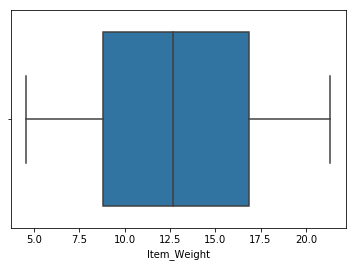

In [910]:
sns.boxplot(data=data, x='Item_Weight')

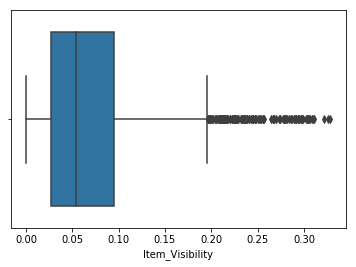

In [911]:
sns.boxplot(data=data, x='Item_Visibility')

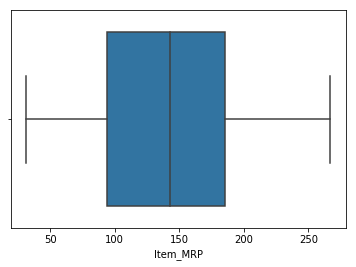

In [912]:
sns.boxplot(data=data, x='Item_MRP')

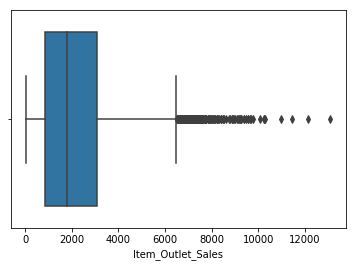

In [913]:
sns.boxplot(data=data, x='Item_Outlet_Sales')

In [914]:
data['Item_Outlet_Sales'].describe()

count     8519.000000
mean      2181.188779
std       1706.511093
min         33.290000
25%        834.247400
50%       1794.331000
75%       3100.630600
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [915]:
IQR = data['Item_Outlet_Sales'].describe()['75%'] - data['Item_Outlet_Sales'].describe()['25%']
IQR

2266.3832

In [916]:
outlier_threshold = data['Item_Outlet_Sales'].describe()['75%'] + 1.5*(IQR)
outlier_threshold

6500.205400000001

In [917]:
data.loc[data['Item_Outlet_Sales'] > outlier_threshold]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.350,lf,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,12.000,lf,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,12.150,lf,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.600,lf,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,10.300,lf,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
240,NCR38,17.250,lf,0.113749,Household,251.3724,OUT045,2002,Small,Tier 2,Supermarket Type1,6795.1548
243,FDY56,16.350,reg,0.062764,Fruits and Vegetables,227.6062,OUT017,2007,Small,Tier 2,Supermarket Type1,7222.5984
275,FDH19,19.350,lf,0.032928,Meat,173.1738,OUT027,1985,Medium,Tier 3,Supermarket Type3,7298.4996
276,FDY55,16.750,lf,0.081253,Fruits and Vegetables,256.4988,OUT013,1987,High,Tier 3,Supermarket Type1,7452.9652
304,DRE60,9.395,lf,0.159658,Soft Drinks,224.9720,OUT045,2002,Small,Tier 2,Supermarket Type1,7696.6480


**remove these??**

In [918]:
data = data.drop(data.loc[data['Item_Outlet_Sales'] > 10000].index.values)
data.shape

(8511, 12)

# Encoding

In [919]:
le = LabelEncoder()
#data['Item_Identifier'] = le.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = le.fit_transform(data['Item_Type'])
#data['Outlet_Identifier'] = le.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = le.fit_transform(data['Outlet_Type'])

## FIXME: these are all ordinal right?

# Base Line Model

In [920]:
X = data[['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Weight', 
          'Outlet_Establishment_Year', 'Item_Visibility', 'Item_MRP']]
y = data['Item_Outlet_Sales']

In [921]:
lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
scores = cross_val_score(lr, X, y, cv=10)
scores.mean()

0.4983326361270114

In [922]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr2 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test)

0.509185696461653

# Normalization

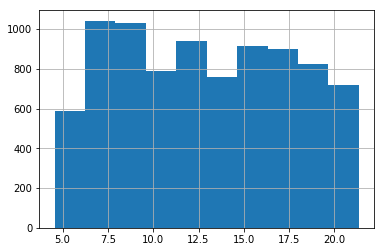

In [923]:
data['Item_Weight'].hist()

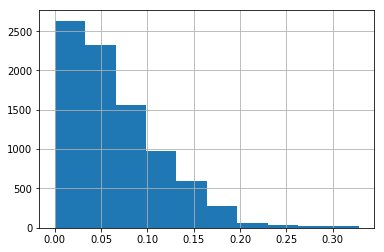

In [924]:
data['Item_Visibility'].hist()

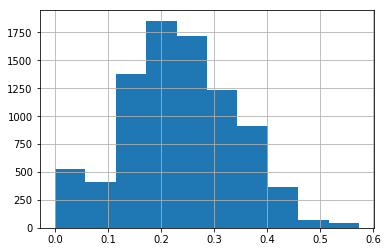

In [925]:
data['Item_Visibility'] = np.sqrt(data['Item_Visibility'])
data['Item_Visibility'].hist()

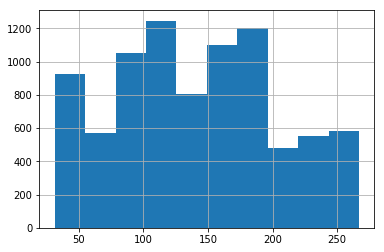

In [926]:
data['Item_MRP'].hist()

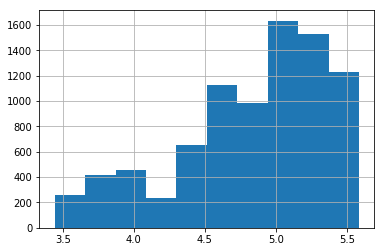

In [927]:
data['Item_MRP'] = np.log(data['Item_MRP'])
data['Item_MRP'].hist()

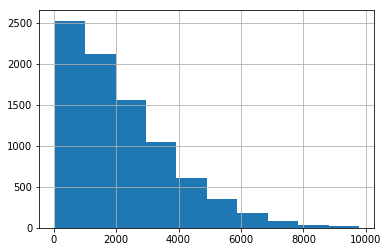

In [928]:
data['Item_Outlet_Sales'].hist()

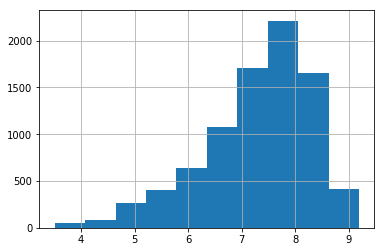

In [929]:
data['Item_Outlet_Sales'] = np.log(data['Item_Outlet_Sales'])
data['Item_Outlet_Sales'].hist()

# Trying model again

In [930]:
X = data[['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Weight', 
          'Outlet_Establishment_Year', 'Item_Visibility', 'Item_MRP']]
y = data['Item_Outlet_Sales']

In [931]:
lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
scores = cross_val_score(lr, X, y, cv=10)
scores.mean()

0.5886256634847096

In [932]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr2 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test)

0.6015023019043844

# Feature Selection

In [933]:
for col in columns:
    colRange = data[col].unique().shape
    print(col, '-', 'categorical' if colRange[0] < 100 else 'continuous', '-', colRange)

Item_Identifier - continuous - (1555,)
Item_Weight - continuous - (497,)
Item_Fat_Content - categorical - (2,)
Item_Visibility - continuous - (7869,)
Item_Type - categorical - (16,)
Item_MRP - continuous - (5934,)
Outlet_Identifier - categorical - (10,)
Outlet_Establishment_Year - categorical - (9,)
Outlet_Size - categorical - (3,)
Outlet_Location_Type - categorical - (3,)
Outlet_Type - categorical - (4,)
Item_Outlet_Sales - continuous - (3485,)


In [934]:
y_copy=data['Item_Outlet_Sales'].copy(True)
sales_bins = pd.qcut(x=y_copy, q=4, labels=False)
sales_bins.value_counts()

1    2135
0    2128
3    2127
2    2121
Name: Item_Outlet_Sales, dtype: int64

In [935]:
cat_x = data[['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
y = sales_bins
correlation_matrix = chi2(cat_x, y)
correlation_matrix[1]

array([3.52492284e-001, 6.74172178e-004, 2.29035179e-002, 5.04973338e-021,
       1.22753552e-005, 2.35254266e-176])

In [936]:
pvals = {}
for i in range(len(correlation_matrix[1])):
    pvals[cat_x.columns.values[i]] = correlation_matrix[1][i]
    
sorted_pvals = sorted(pvals.items(), key=lambda x: x[1], reverse=True)
sorted_pvals

[('Item_Fat_Content', 0.352492283779546),
 ('Outlet_Establishment_Year', 0.022903517922565748),
 ('Item_Type', 0.0006741721775369697),
 ('Outlet_Location_Type', 1.2275355231908767e-05),
 ('Outlet_Size', 5.049733382572359e-21),
 ('Outlet_Type', 2.352542659066594e-176)]

In [937]:
# Item_Fat_Content has high enough p value to remove it.

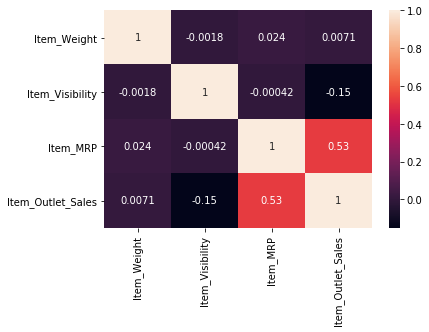

In [938]:
con_var = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']]
sns.heatmap(con_var.corr(), annot=True)

In [939]:
# Item_Weight and Item_Visibility has very low correlation to ignore. 

**Selected Features for model**
1. Outlet_Establishment_Year
2. Item_Type
3. Outlet_Location_Type
4. Outlet_Size
5. Outlet_Type
6. Item_MRP

# Trying model again

In [958]:
# 'Item_Visibility', 'Item_Fat_Content', 'Item_Weight']]
X = data[['Outlet_Establishment_Year', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_MRP', 
          'Item_Fat_Content', 'Item_Weight']]
y = data['Item_Outlet_Sales']

In [961]:
lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
scores = cross_val_score(lr, X, y, cv=10)
scores.mean()

0.58574330287868

In [962]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr2 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test)

0.5974257105223653

# Model Selection

In [965]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [966]:
X = data[['Outlet_Establishment_Year', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_MRP', 
          'Item_Fat_Content', 'Item_Weight']]
y = data['Item_Outlet_Sales']

In [967]:
gbr = GradientBoostingRegressor(n_estimators=100, loss='ls')
scores = cross_val_score(gbr, X, y, cv=5)
scores.mean()

0.7348600926695159

In [970]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
gbr2 = GradientBoostingRegressor(n_estimators=100, loss='huber')
gbr2.fit(X_train, y_train)
gbr2.score(X_test, y_test)

0.7458697125107983

In [971]:
gbr2.score(X_train, y_train)

0.7516746108337773